Exploratory Data Analysis (EDA) is a crucial process in data analysis that allows analysts to gain a comprehensive understanding of the dataset's characteristics, uncover patterns, and make informed decisions. Through statistical techniques and visualization tools, EDA enables analysts to explore and summarize the data, assess its quality, and identify relationships between variables. This process serves as the foundation for further analysis and hypothesis generation, driving evidence-based decision-making.





library importations for EDA using used car dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import copy
import seaborn as sns

In [3]:
#reading of dataset into the session using google drive location mounted into the session
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/used_cars_data.csv'
data_copy = pd.read_csv(dataset_path)
data = data_copy

checking information on the dataset to have an overview of what it contains regarding the amount of observation(rows) and features (columns)

In [4]:
print(f'The data contains {data.shape[1]} features of {data.shape[0]} lenght in total number of obervations')

The data contains 14 features of 7253 lenght in total number of obervations


In [5]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


Upon reviewing the head and tail of the dataset, it is evident that there are instances of missing data present. Furthermore, the dataset consists of variables that exhibit a mix of numerical and categorical values, with some variables solely comprised of numerical entries and others solely comprised of character entries. This diversity in data types necessitates careful consideration during the exploratory data analysis process.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Upon examination, it is evident that several variables, specifically Mileage, Engine, Power, Seats, New_Price, and Price, exhibit missing values within the dataset. Additionally, the analysis reveals a distinct data type pattern among the variables. Notably, the variables year, S.No, and kilometers_driven share a common data type, namely int64. Conversely, seat and price are characterized by the float64 data type. Moreover, the remaining features within the dataset are represented as categorical variables, denoted by the object data type.

In [8]:
print(f'The number of unique variable on every data feautures are shown below\n\n{data.nunique()}')

The number of unique variable on every data feautures are shown below

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64


After determining the number of unique variables present in each feature, it would be informative to display the unique values for each respective feature. This exploration will focus on features that have 21 or fewer unique values, allowing for a concise and manageable examination of their distinct categories. By delving into these features, we can gain insights into the specific categories or levels they encompass, providing a deeper understanding of the dataset's categorical variables.

In [9]:
variable_names = data.columns
for column_value in variable_names:
  #this goes through each columns  and get the amount of value
  length_column = len(pd.unique(data[column_value]))
  if length_column <= 21:
    #setting a conditions to get values less than 21
    print(f'{column_value}: {pd.unique(data[column_value])}')

Location: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type: ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission: ['Manual' 'Automatic']
Owner_Type: ['First' 'Second' 'Fourth & Above' 'Third']
Seats: [ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]


The summary of the results is as follows:

Location: The dataset includes cars from various cities, including Mumbai, Pune, Chennai, Coimbatore, Hyderabad, Jaipur, Kochi, Kolkata, Delhi, Bangalore, and Ahmedabad.
Fuel_Type: The available fuel types for the cars in the dataset are CNG, Diesel, Petrol, LPG, and Electric.
Transmission: The cars in the dataset have either a manual or automatic transmission.
Owner_Type: The dataset contains cars with different owner types, including First, Second, Third, and Fourth & Above.
Seats: The number of seats in the cars ranges from 0 to 10, with some missing values (NaN) indicating unknown seat counts.

From the above we can see the distinct categorical values present in the data.
Now i will like to check into the missing values in the data and percentage missing from the data

In [10]:
print(f'The number of missing values are given below\n\n{data.isnull().sum()}') #this tell the total amount of null value
print(f'\nBelow shows the percentage of missing values\n\n{(data.isnull().sum()/(len(data)))*100}') # This further tell the percentage of missing values


The number of missing values are given below

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Below shows the percentage of missing values

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64


Based on the above findings, it is apparent that the "new_price" feature exhibits a significantly high percentage of missing values, accounting for approximately 86% of the data. Similarly, the "price" feature displays a missing value percentage of approximately 17%. On the other hand, the "mileage" feature has the lowest proportion of missing values, with only 0.02% of the data being affected.

Having gained an understanding of the features and their corresponding missing value percentages, it is now possible to streamline the dataset by removing irrelevant features and adding new features that may contribute significantly to the intended analysis. This step aims to enhance the focus and relevance of the data, ensuring that subsequent analyses and modeling efforts are conducted on a more meaningful and informative subset of the dataset.

In [11]:
#removing the S.No columns since it dont add to the feautures
data = data.drop(['S.No.'], axis= 1)
print(f' {data.info()} \n\nThis shows the implementation of the removal of the S.NO. from the data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB
 None 

This shows the implementation of the removal of the S.NO. from the data


In [12]:
#adding the age of the car which can be achieve using the present date and year of production differences
present_year = date.today().year
year_prod = data['Year']
data['Age_of_car'] = present_year - year_prod

Upon inspection, it becomes apparent that the "name" column in the dataset encompasses both the car's name and its brand and model information. To enhance clarity and facilitate analysis, it would be beneficial to extract and create separate features for the brand name and model from the existing "name" column. This step would enable a more precise categorization and understanding of the data, providing additional insights into the specific car brands and models present in the dataset.

In [13]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [14]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age_of_car,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10,Audi,A4New


The aforementioned code demonstrates the incorporation of the new features into the dataset. Furthermore, ensuring consistency in the categorical values across the features is crucial to prevent the interpretation of the same item using different terms. By conducting a thorough check of the categorical values, we can identify and rectify any inconsistencies or discrepancies, thereby promoting uniformity and accuracy in the representation of the data

In [15]:
variable_names = data.columns
for column_value in variable_names:
  #this goes through each columns  and get the amount of value
  length_column = len(pd.unique(data[column_value]))
  if length_column <= 33:
    #setting a conditions to get values less than or equal to 33
    print(f'{column_value}: {pd.unique(data[column_value])}')

Location: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Year: [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]
Fuel_Type: ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission: ['Manual' 'Automatic']
Owner_Type: ['First' 'Second' 'Fourth & Above' 'Third']
Seats: [ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]
Age_of_car: [13  8 12 11 10  7  5  9  6 16 14 15  4 17 18 19 21 23 20 24 22 25 27]
Brand: ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


The provided code showcases the categorical values within the dataset that contain fewer than 33 characters. It reveals the unique values present across all features. Observing the results, we can identify variations in the representation of certain names, such as 'ISUZU' and 'Isuzu,' indicating inconsistency in capitalization. Additionally, partial representations of certain names like 'mini' and 'land' suggest that they may not be in their complete or standardized form. Ensuring consistency in the naming conventions and addressing such discrepancies is essential for accurate and reliable data analysis.

In [16]:
data['Brand'].replace({'ISUZU' : 'Isuzu', 'Mini' : 'Mini_Cooper', 'Land' : 'Land_Rover'}, inplace = True )

print('\n implementatiion of the names variations is been dispayed below \n')
variable_names = data.columns
for column_value in variable_names:
  #this goes through each columns  and get the amount of value
  length_column = len(pd.unique(data[column_value]))
  if length_column <= 33:
    #setting a conditions to get values less than or equal to 33
    print(f'{column_value}: {pd.unique(data[column_value])}')


 implementatiion of the names variations is been dispayed below 

Location: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Year: [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]
Fuel_Type: ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission: ['Manual' 'Automatic']
Owner_Type: ['First' 'Second' 'Fourth & Above' 'Third']
Seats: [ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]
Age_of_car: [13  8 12 11 10  7  5  9  6 16 14 15  4 17 18 19 21 23 20 24 22 25 27]
Brand: ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land_Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini_Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']


In order to conduct an effective Exploratory Data Analysis (EDA), it is imperative to examine the basic statistics of the data and distinguish between categorical and numerical variables. By analyzing the descriptive statistics of numerical variables, such as mean, median, and standard deviation, we gain insights into their central tendencies and variability. Simultaneously, segregating the categorical values allows us to understand the distinct categories and levels within the dataset, enabling further exploration and analysis specific to each variable type.








In [17]:
#this extract the numerical values alone omittiing the units
#extracting the first values in the mileage column and casting the data type into float
data['Mileage'] = data.Mileage.str.split().str.get(0)
data['Mileage'] = np.float64(data['Mileage'])
#extracting the first values in the engine column and casting the data type into float
data['Engine'] = data.Engine.str.split().str.get(0)
data['Engine'] = np.float64(data['Engine'])
#extracting the first values in the power column and casting the data type into float
data['Power'] = data.Power.str.split().str.get(0)
#changing the null values present into usable format of numpy and casting the type into float
data['Power'] = data['Power'].replace('null', np.nan)
data['Power'] = np.float64(data['Power'])
#also performing similar task done for power for new_price column
data['New_Price'] = data['New_Price'].str.split().str.get(0)
data['New_Price'] =  data['New_Price'].replace('null', np.nan)
data['New_Price']=  np.float64(data['New_Price'])


In [18]:
# this only describe the numerical values in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.00,10.00
New_Price,1006.0,19.894324,19.813947,1.00,7.635,11.27,23.64,99.92
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.95,160.00
Age_of_car,7253.0,9.634634,3.254421,4.00,7.000,9.00,12.00,27.00


In [19]:
#this describe all the feauture in the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


In [20]:
# this only describe the numerical values in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.00,10.00
New_Price,1006.0,19.894324,19.813947,1.00,7.635,11.27,23.64,99.92
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.95,160.00
Age_of_car,7253.0,9.634634,3.254421,4.00,7.000,9.00,12.00,27.00


In [21]:
#this describe all the feauture in the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


Seperating the feature to usable data format that are needed for the EDA, some feauture are important in a data type format that are not suitable for EDA usecase and their format will be change acros data

In [22]:
#seperating the numerical dataset and categorical datasets

categorical_features = data.select_dtypes(include= ['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

#numerical feautures names can also be extracted using
#numerical_features = data.select_dtypes(include=np.number).columns.tolist()

In [23]:
print(numerical_features)
print(categorical_features)

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Age_of_car']
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Age_of_car         7253 non-null   int64  
 14  Brand              7253 non-null   object 
 15  Model              7252 non-null   object 
dtypes: float64(6), int64(3),

Year
Skew : -0.84


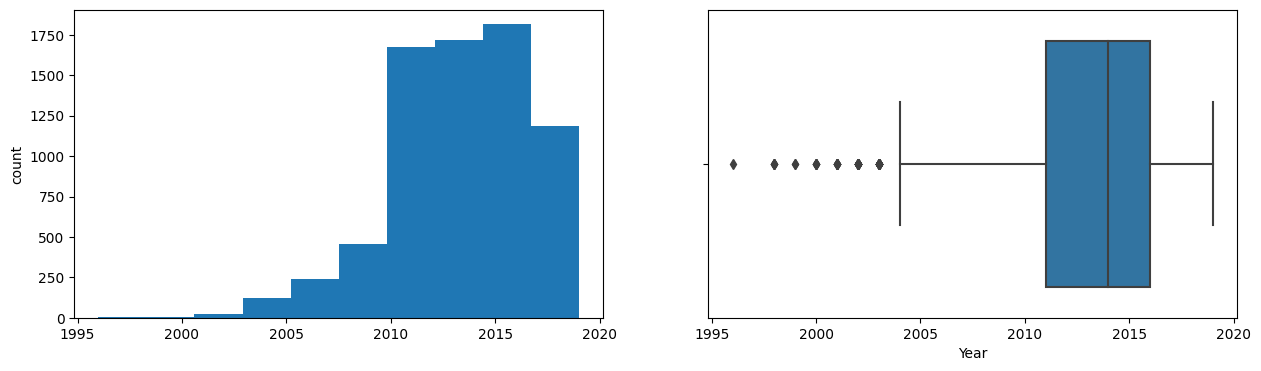

Kilometers_Driven
Skew : 61.58


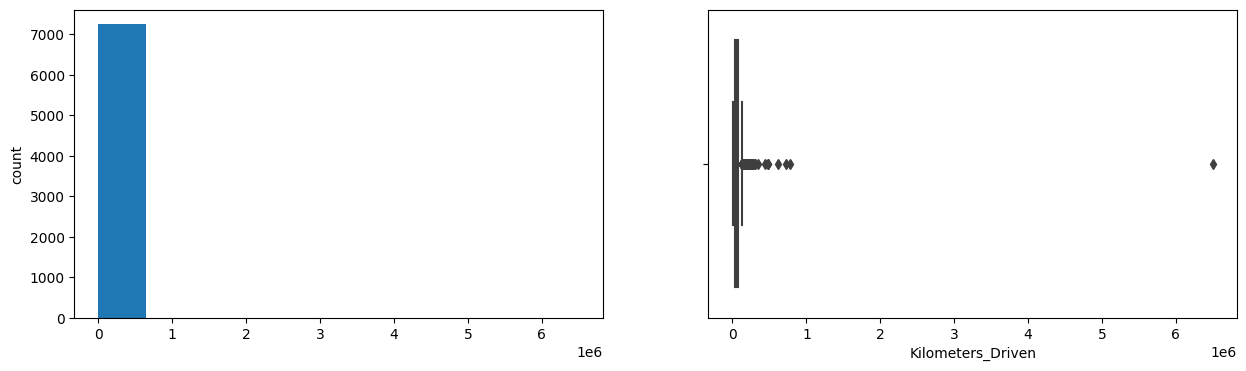

Mileage
Skew : -0.44


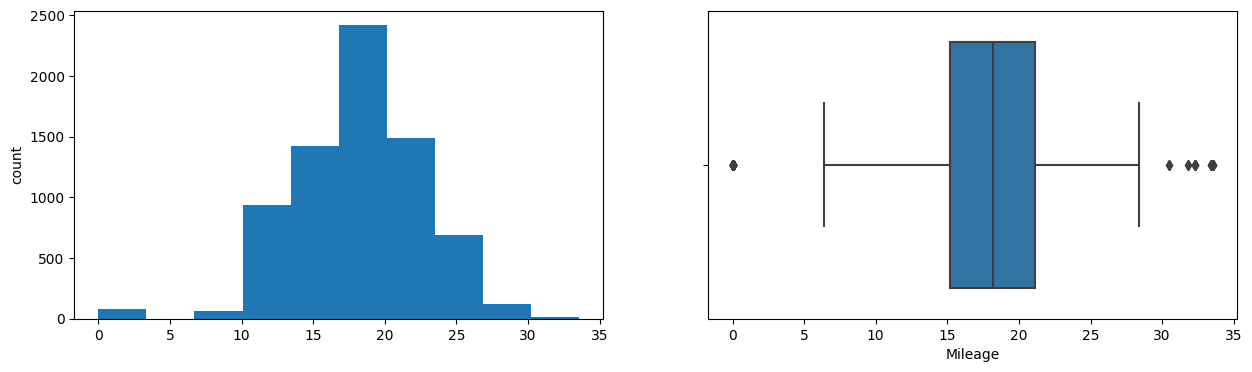

Engine
Skew : 1.41


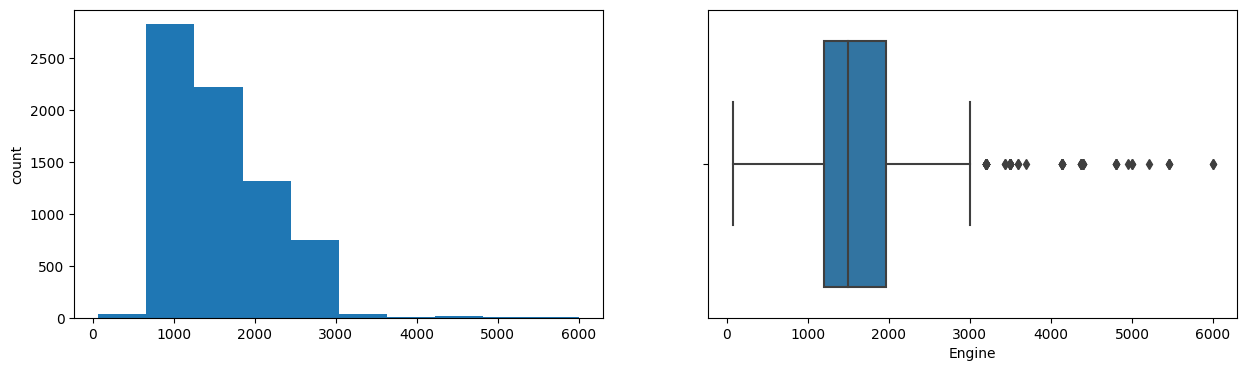

Power
Skew : 1.96


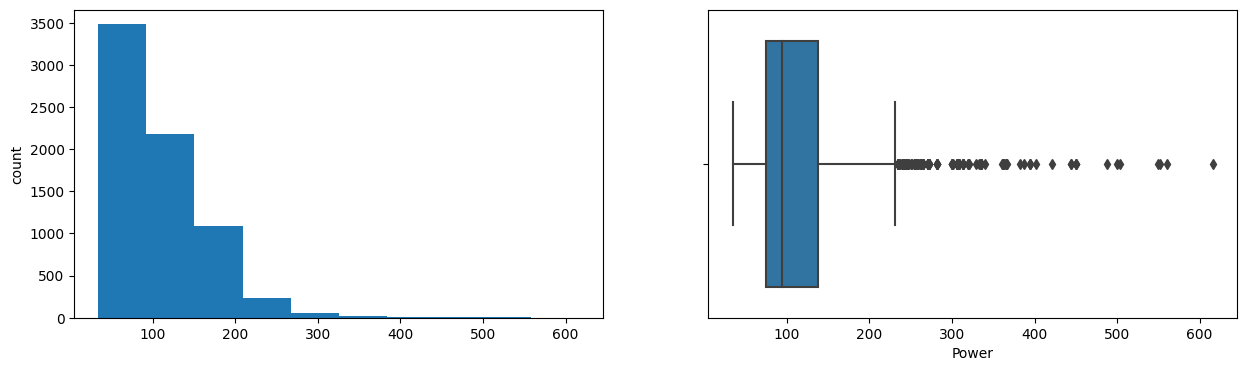

Seats
Skew : 1.9


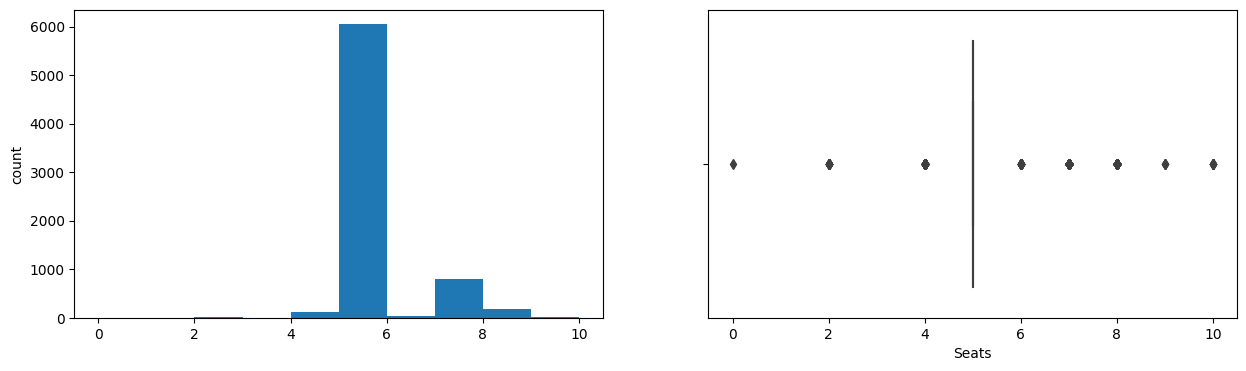

New_Price
Skew : 1.84


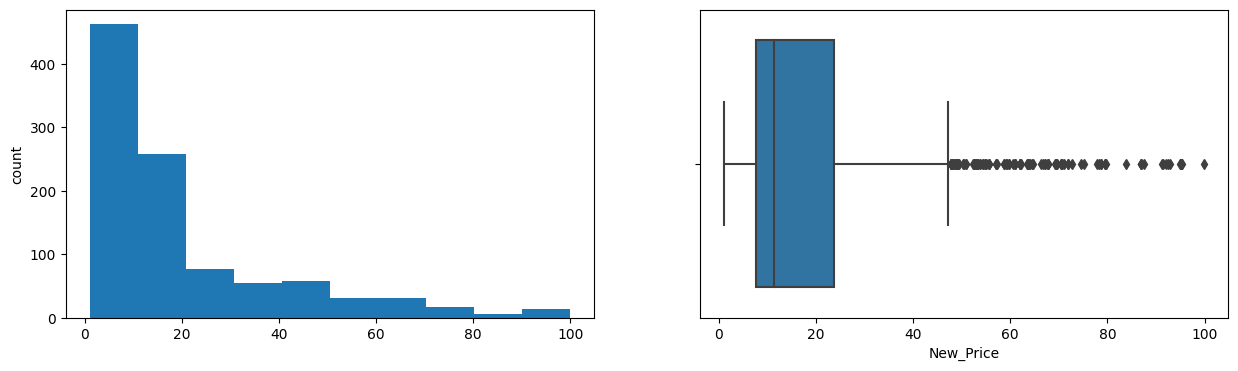

Price
Skew : 3.34


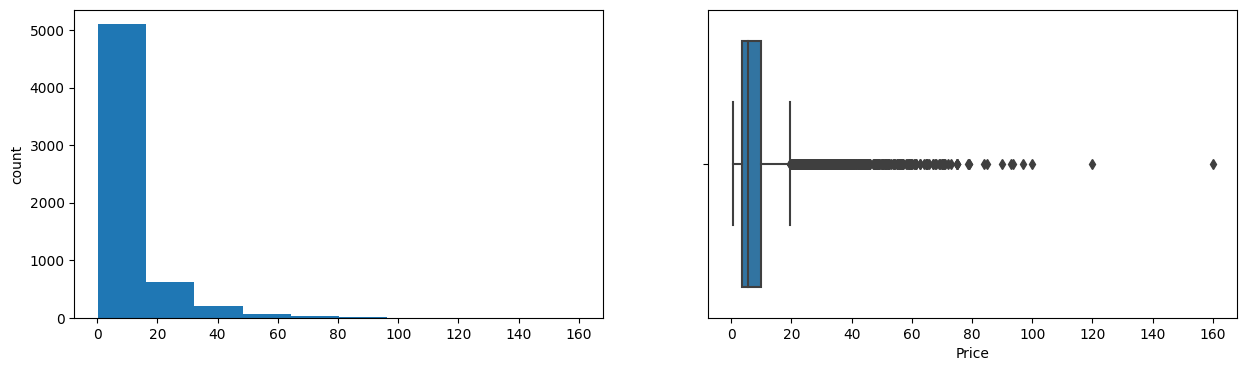

Age_of_car
Skew : 0.84


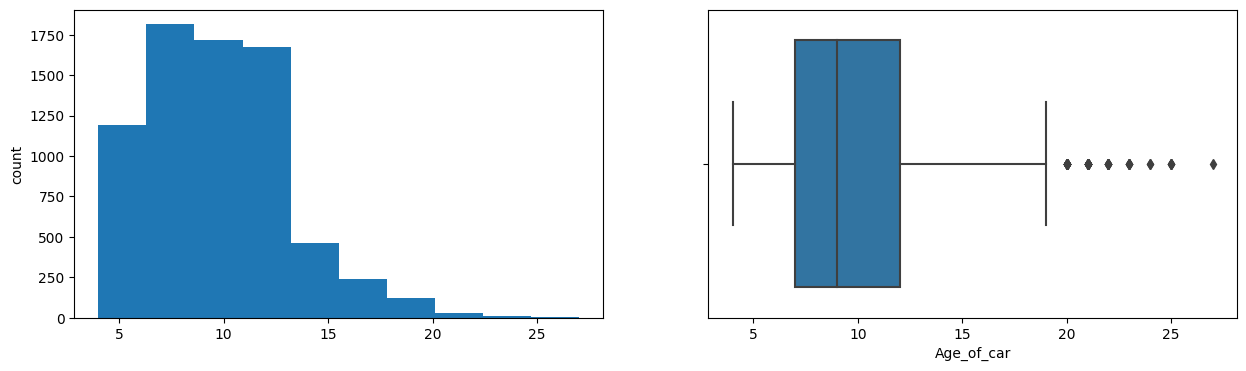

In [25]:
for col in numerical_features:
  print(col)
  print('Skew :', round(data[col].skew(), 2))
  plt.figure(figsize = (15, 4))
  plt.subplot(1, 2, 1)
  data[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=data[col])
  plt.show()

A skewness close to zero indicates a roughly symmetric distribution, positive skewness (skewness > 0) suggests a longer right tail with outliers towards higher values, and negative skewness (skewness < 0) implies a longer left tail with outliers towards lower values.

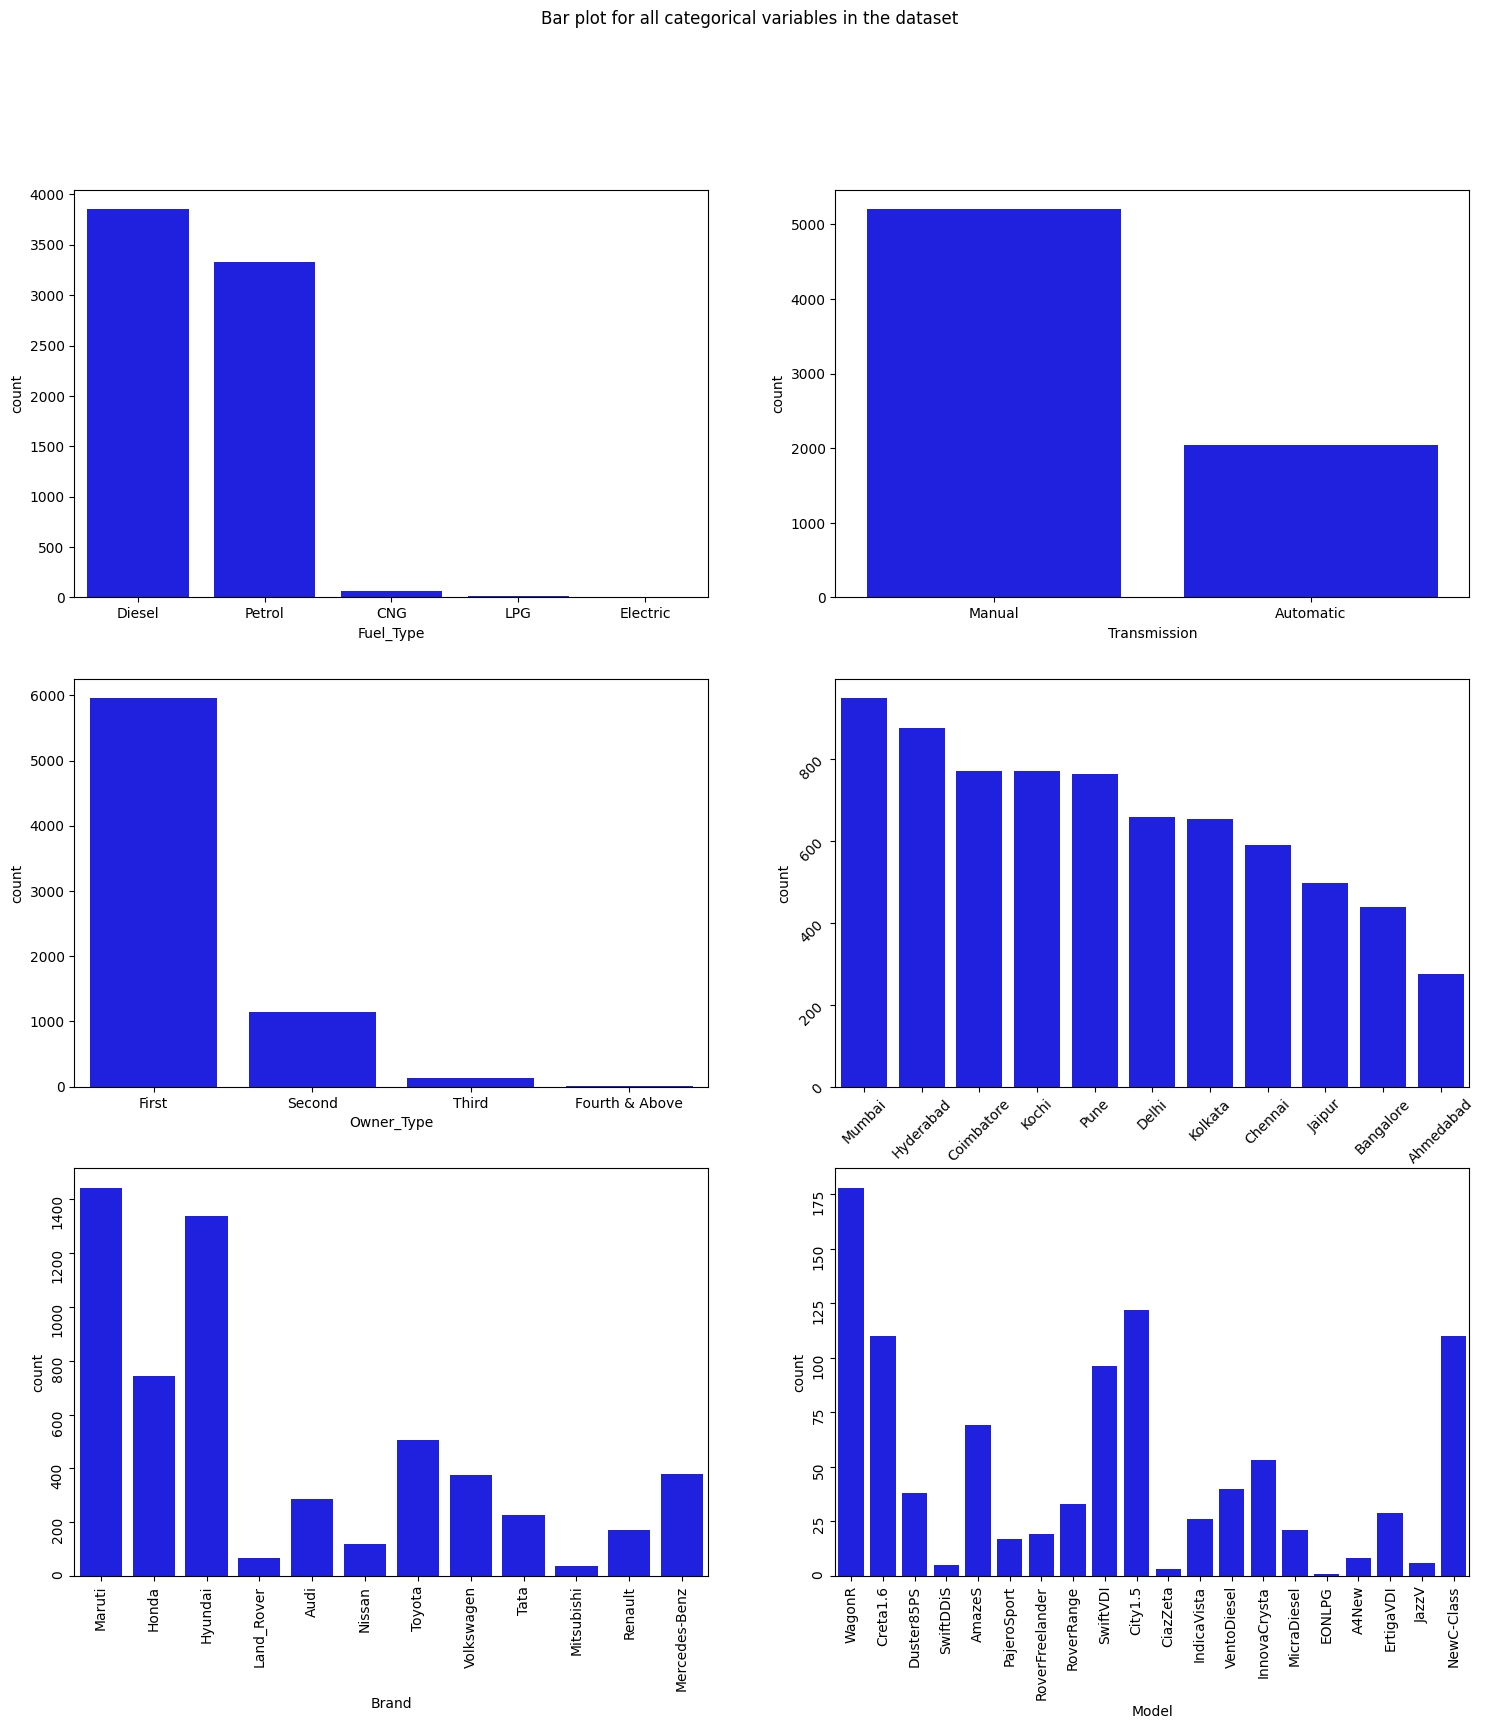

In [26]:
#using barplot to show the distribution of the cateogorical values is presented
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue',
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue',
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue',
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue',
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue',
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

Based on the count plot analysis, the following observations can be made:

Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore. This indicates a higher demand for cars in these cities.

Approximately 53% of the cars in the dataset run on diesel fuel, suggesting a preference for diesel-powered vehicles, possibly due to their perceived higher performance or fuel efficiency.

Manual transmission is the predominant choice, with approximately 72% of cars equipped with this type of transmission. This indicates a preference for manual control among car buyers.

The majority of cars (around 82%) in the dataset are classified as first-owned cars, indicating that many buyers prefer purchasing brand new vehicles rather than used ones.

In terms of brands, Maruti holds the largest market share, accounting for approximately 20% of the cars in the dataset, followed closely by Hyundai with 19%. This highlights the popularity of these brands among car buyers.

Among the available car models, WagonR ranks first in terms of availability for purchase, indicating its popularity and widespread availability in the market.

These observations provide valuable insights into the regional car market preferences, fuel type choices, transmission preferences, ownership patterns, and popular brands and models among car buyers.

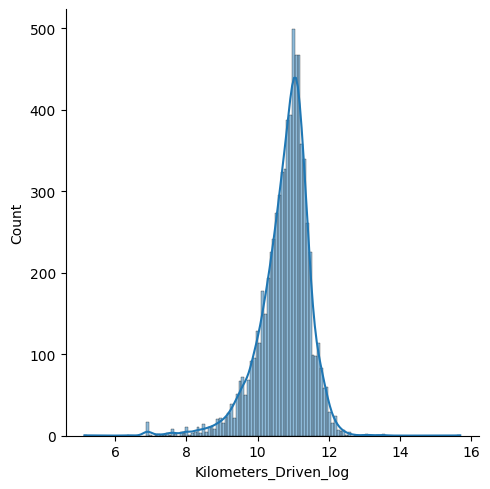

In [27]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
log_transform(data,['Kilometers_Driven','Price'])
#Log transformation of the feature 'Kilometers_Driven'
sns.displot(data["Kilometers_Driven_log"], kde = True)

<Figure size 1300x1700 with 0 Axes>

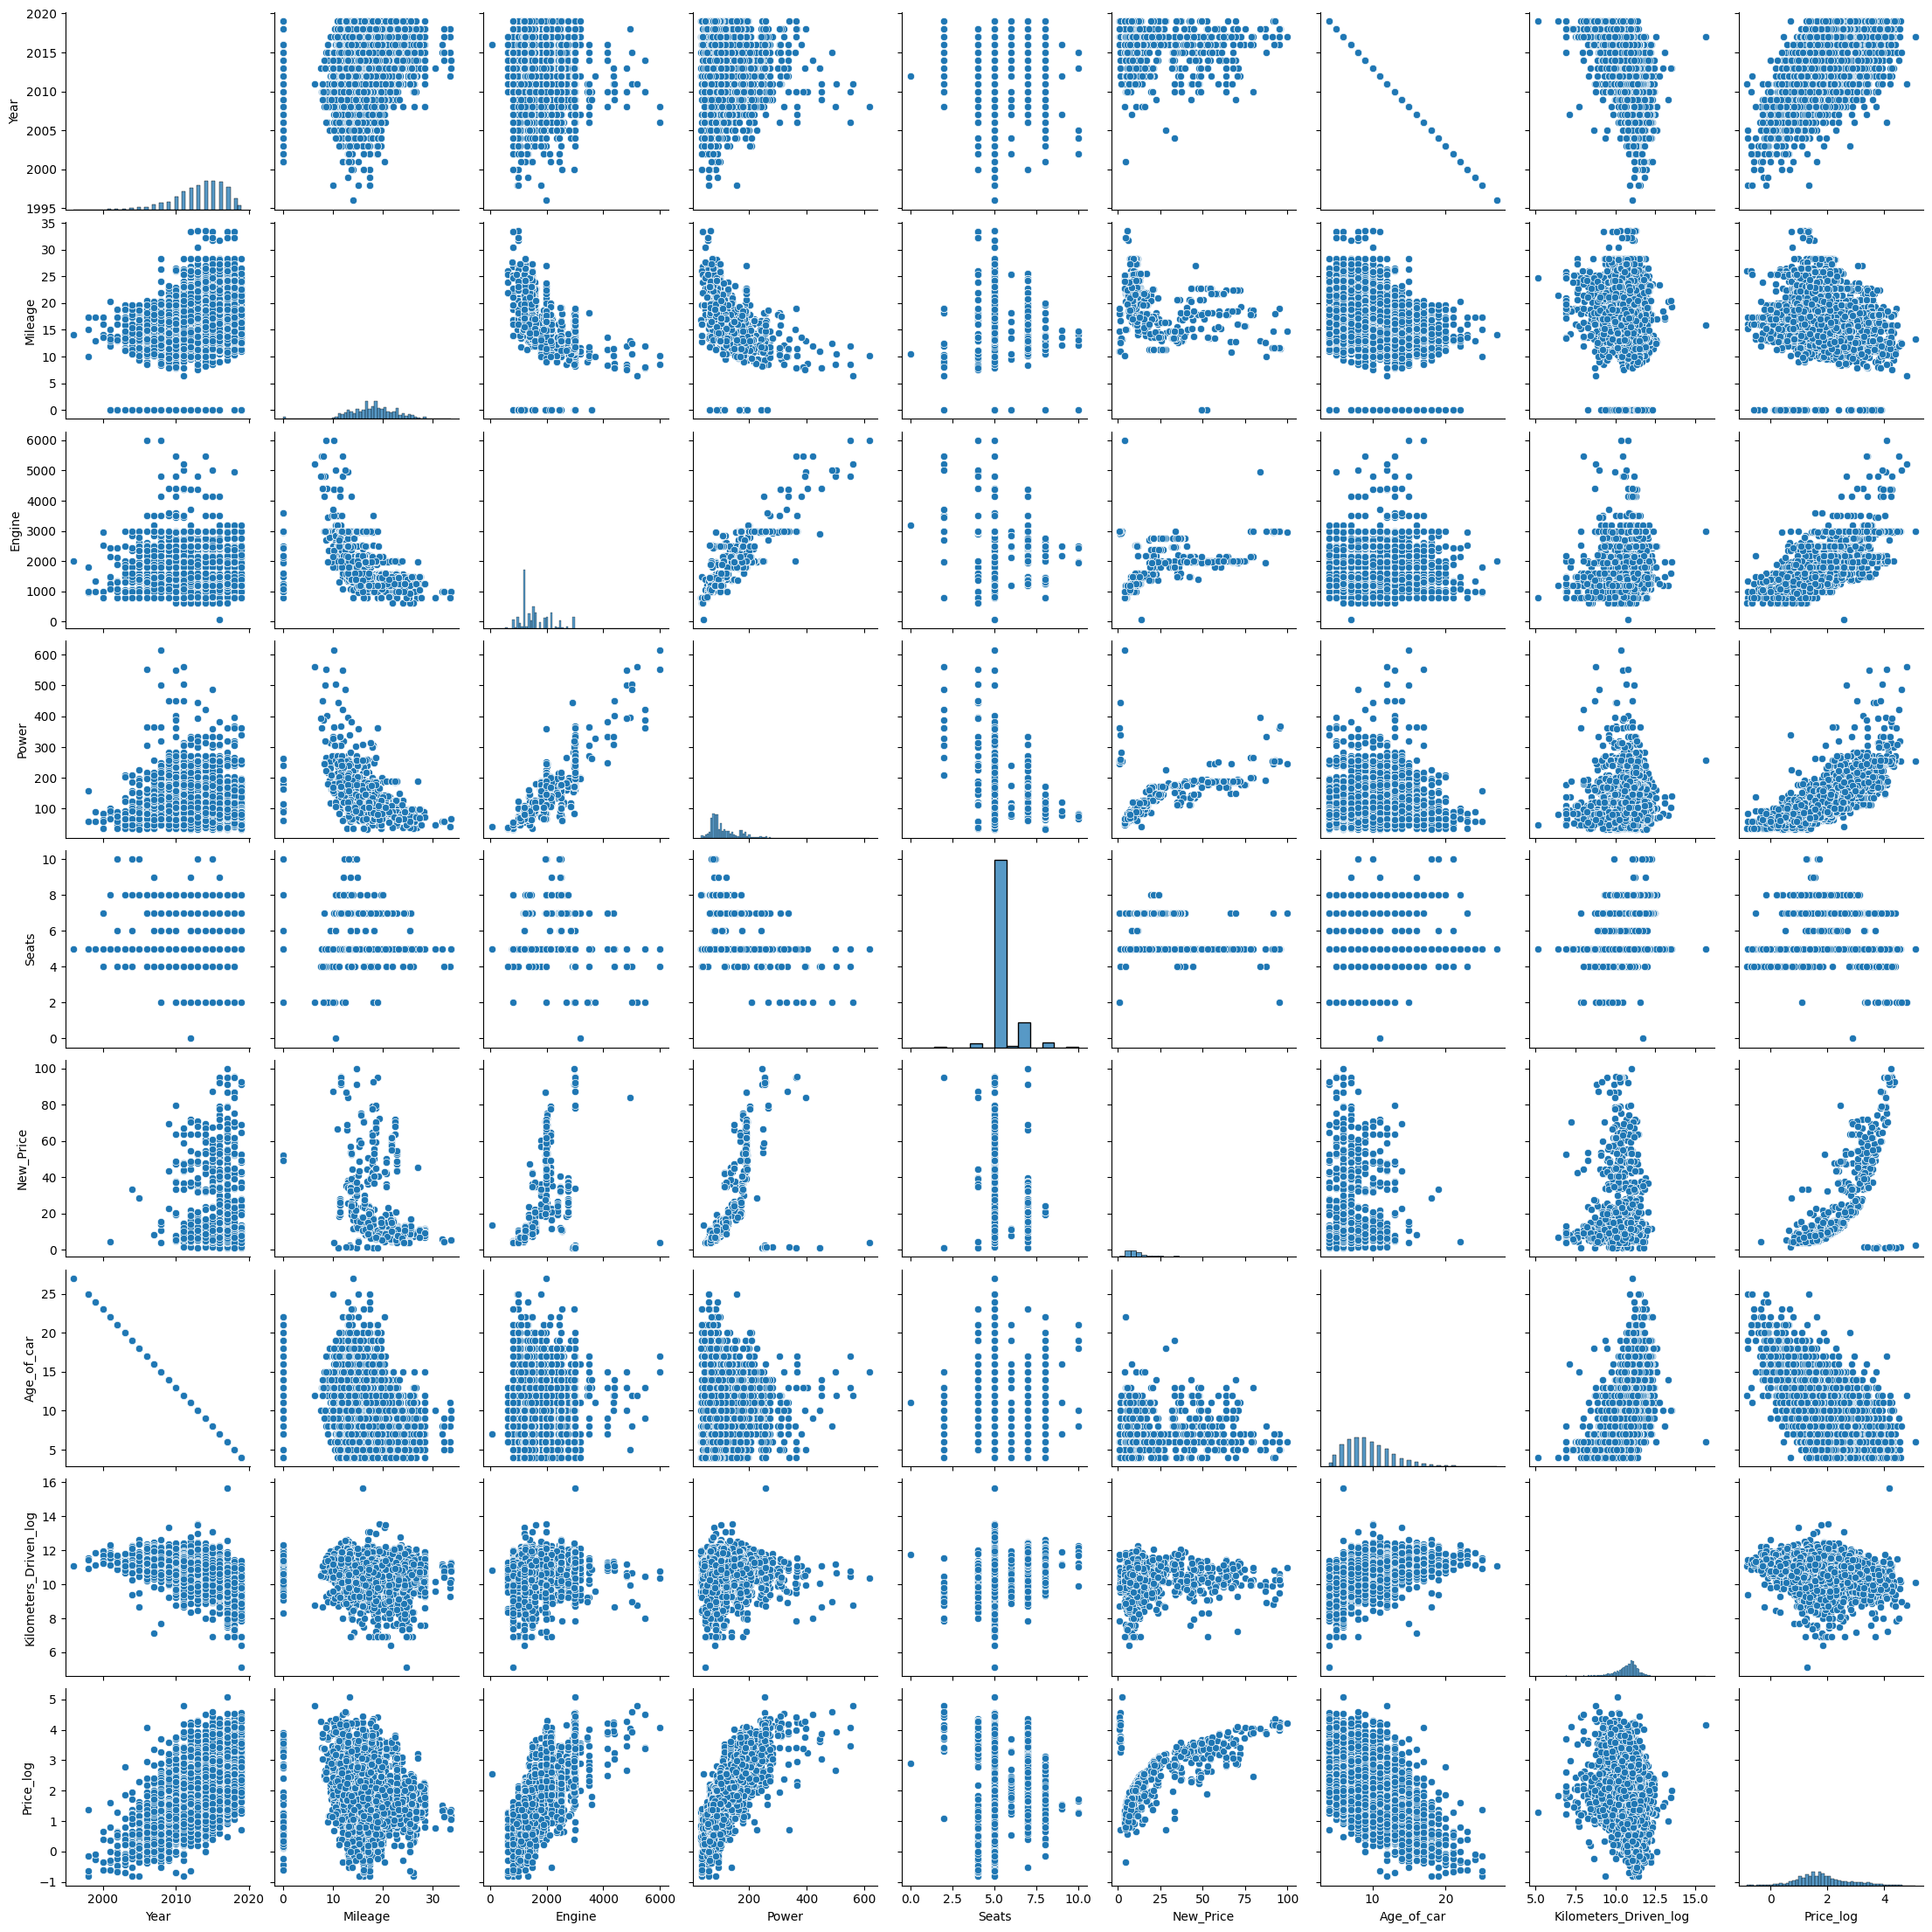

In [28]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

The bivariate analysis conducted on the numerical variables reveals several correlations:

The variable "Year" exhibits a positive correlation with both "Price" and "Mileage". This implies that newer cars tend to have higher prices and better mileage.

Conversely, the "Year" variable shows a negative correlation with "Kilometers_Driven". This suggests that as the year of the car increases, the number of kilometers driven tends to decrease.

There is a negative correlation between "Mileage" and "Power". This indicates that as the power of a car increases, its mileage tends to decrease.

Additionally, the analysis indicates that car prices tend to be higher for more recent makes, while prices decrease with the increasing age of the car.

Furthermore, there is a positive correlation between "Engine" and both "Power" and "Price". This implies that as the engine and power of a car increase, so does its price.

These findings provide valuable insights into the relationships between various numerical variables in the dataset, aiding in a better understanding of how different factors impact the price, mileage, and overall characteristics of used cars.

In [29]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Age_of_car', 'Brand', 'Model',
       'Kilometers_Driven_log', 'Price_log'],
      dtype='object')

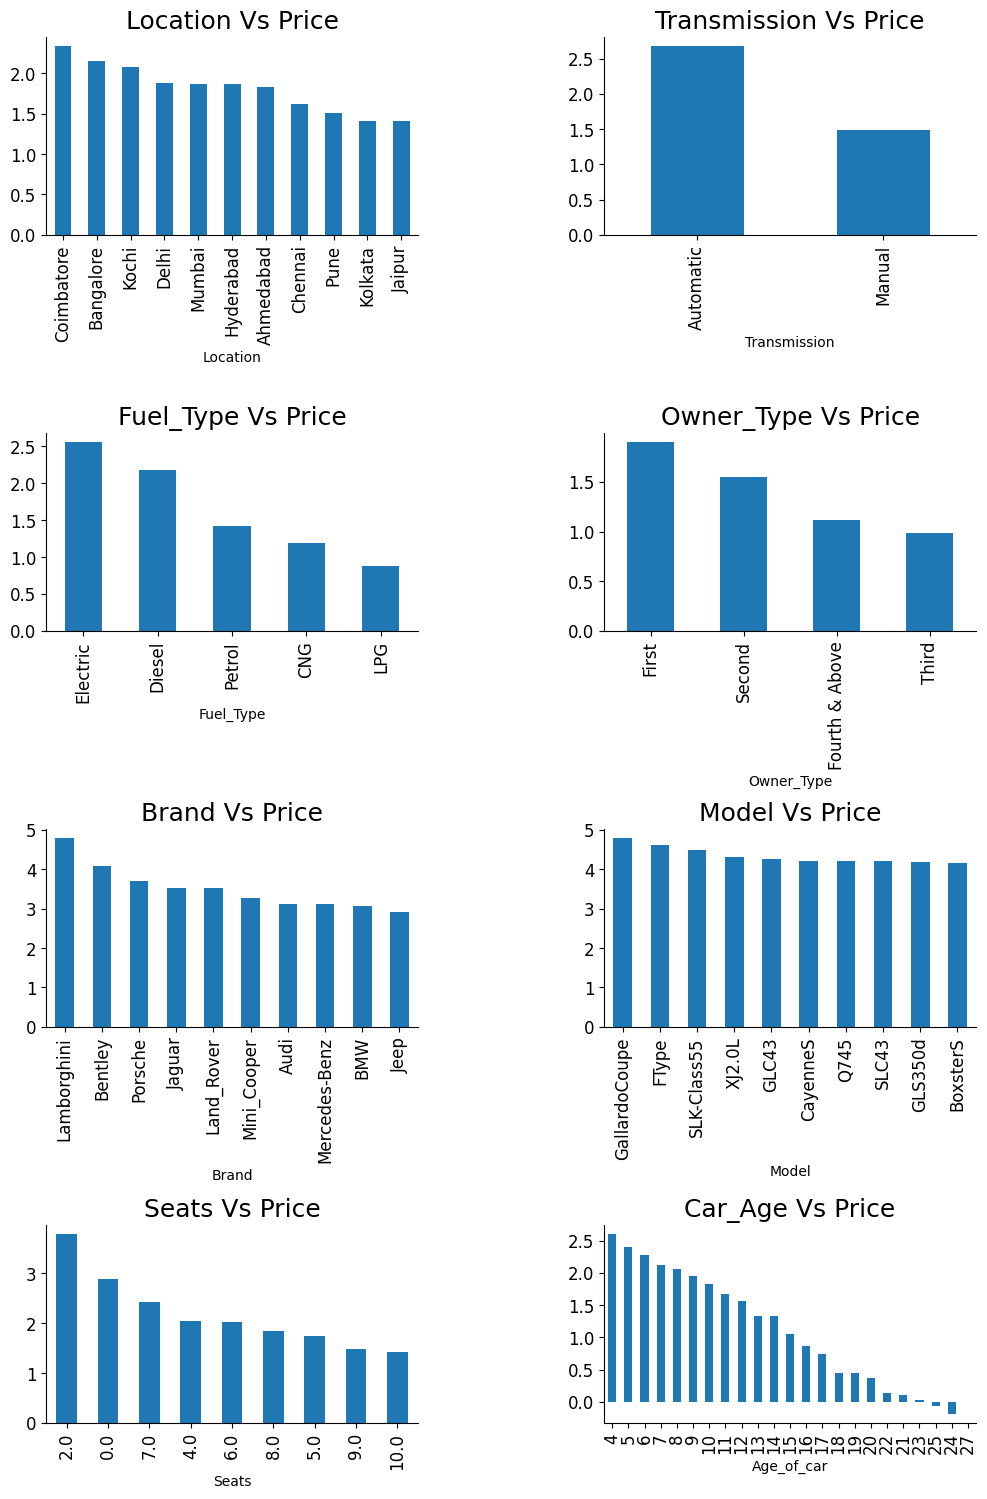

In [30]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Age_of_car')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

The categorical bivariate analysis conducted on the dataset revealed the following findings:

The price of cars is relatively higher in Coimbatore, while Kolkata and Jaipur have comparatively lower prices.

Automatic cars tend to have higher prices compared to manual cars.

Among the different fuel types, diesel and electric cars have similar maximum prices, while LPG cars have the lowest prices.

First-owner cars generally command higher prices, followed by second-owner cars. The prices tend to decrease further for third-owner cars and those with four or more previous owners.

The brand "Lamborghini" stands out with the highest prices among all the car brands in the dataset.

The "Gallardocoupe" model is the most expensive among all the car models.

Cars with two-seater capacity tend to have the highest prices, followed by those with seven-seater capacity.

The latest model cars, indicating newer releases, exhibit higher prices compared to older models.

<ipython-input-31-f1613aac621b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)


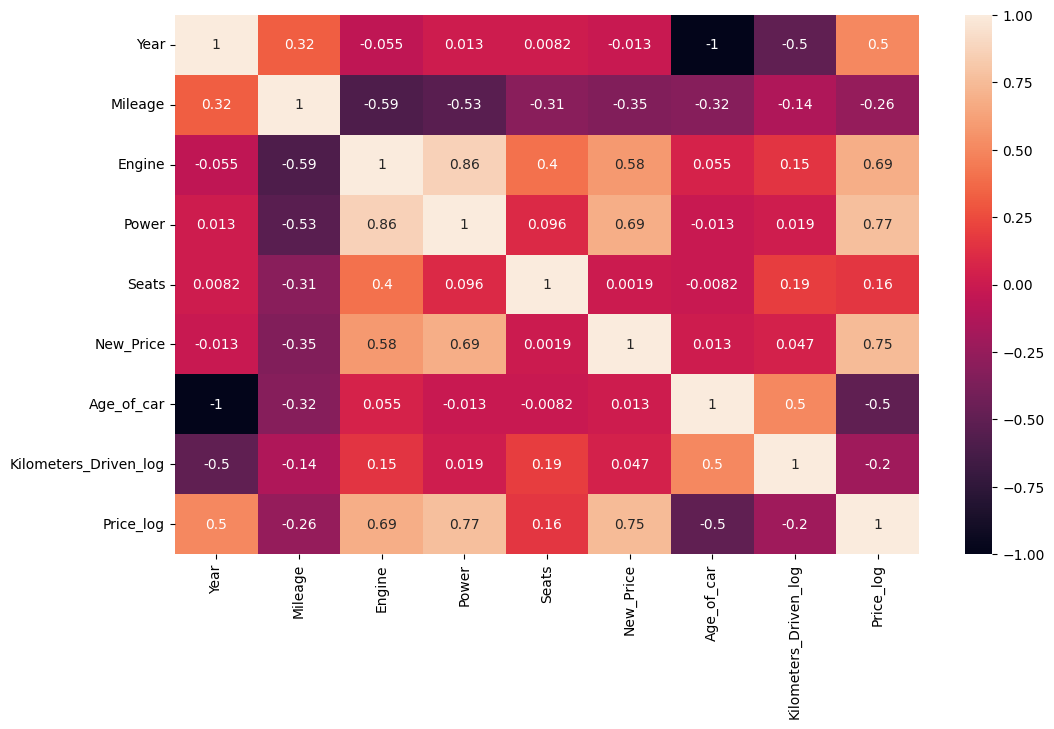

In [31]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Based on the analysis of the heatmap, the following observations can be made:

The variable "Engine" exhibits a strong positive correlation with "Power" (0.86), indicating that as the engine size increases, the power of the car also tends to increase.

Both "Engine" (0.69) and "Power" (0.77) show positive correlations with "Price", implying that cars with larger engines and higher power tend to have higher prices.

"Mileage" shows negative correlations with "Engine", "Power", and "Price". This suggests that cars with higher mileage tend to have smaller engines, lower power, and lower prices.

"Price" demonstrates a moderate positive correlation with "Year", indicating that newer cars tend to have higher prices.

"Kilometers_Driven" has a negative correlation with "Year", suggesting that as the car's age increases, the number of kilometers driven decreases. However, this variable does not have a significant impact on the price.

"Car_Age" shows a negative correlation with "Price", implying that as the car gets older, its price tends to decrease.

"Car_Age" is positively correlated with "Kilometers_Driven", indicating that as the car's age increases, the number of kilometers driven also tends to increase. Additionally, "Car_Age" has a negative correlation with "Mileage", which aligns with the expectation that older cars tend to have lower mileage.

Imputing missing values is an essential step in data analysis when dealing with incomplete datasets. There are various methods available for imputation, such as using the mean, median, mode, or even more advanced algorithms like KNN or regularization.

However, it is important to note that imputing missing values cannot be done blindly using simple statistical measures alone. It requires a deep understanding of the data and domain knowledge. Having insights into the specific characteristics of the dataset can greatly enhance the imputation process. In some cases, certain values can be imputed based on assumptions or logical reasoning.

In our specific dataset, we have identified missing values in columns such as Mileage, Power, and Seats. Upon closer examination, we noticed that some entries had zero values for Mileage, which appeared to be a data entry issue. To address this, we decided to fill the missing values with zeros and then impute the remaining values using the mean value of Mileage. Since the mean and median values were found to be quite similar for this variable, we opted to use the mean as the imputation strategy.

By applying this imputation technique, we can effectively handle missing values in the dataset and ensure that our subsequent analysis and modeling processes are based on a more complete and reliable dataset.

In [33]:
data2 = copy.deepcopy(data)

In [34]:
data2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age_of_car,Brand,Model,Kilometers_Driven_log,Price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,WagonR,11.184421,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8,Hyundai,Creta1.6,10.621327,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12,Honda,JazzV,10.736397,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,ErtigaVDI,11.373663,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10,Audi,A4New,10.613246,2.875822


In [59]:
data2.loc[data["Mileage"]==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age_of_car,Brand,Model,Kilometers_Driven_log,Price_log
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,5.0,2179.0,115.0,5.0,NaN,17.50,11,Land_Rover,RoverFreelander,11.350407,2.862201
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,5.0,1950.0,194.0,5.0,49.14,35.67,4,Mercedes-Benz,C-ClassProgressive,9.640108,3.574310
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,5.0,1086.0,NaN,5.0,NaN,1.30,18,Hyundai,SantroXing,11.380434,0.262364
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,5.0,NaN,NaN,NaN,NaN,2.95,16,Honda,City1.5,11.002200,1.081805
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,5.0,1498.0,99.0,NaN,NaN,3.60,8,Ford,FigoDiesel,11.162460,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,5.0,NaN,NaN,NaN,NaN,NaN,7,Mahindra,TUV300,10.203592,NaN
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,5.0,1086.0,NaN,5.0,NaN,NaN,16,Hyundai,SantroXing,11.350407,NaN
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,5.0,2179.0,115.0,5.0,NaN,NaN,12,Land_Rover,RoverFreelander,11.373663,NaN
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,5.0,1199.0,88.7,NaN,NaN,NaN,4,Honda,Jazz2020,9.356516,NaN


In [36]:
data2.loc[data["Mileage"]== 0.0, 'Mileage'] = np.nan
print(f'The total number of missing values are {data2.Mileage.isnull().sum()}')
data2['Mileage'].fillna(value = np.mean(data['Mileage']), inplace = True)
print(f'\nThe present number of missing values after filling {data2.Mileage.isnull().sum()}')

The total number of missing values are 81

The present number of missing values after filling 0


Data preprocessing includes data integration, analysis, cleaning, transformation, and dimension reduction. Feature engineering involves techniques such as adding/removing relevant features, handling missing data, and encoding categorical variables. The article focuses on performing these steps using Python.

The Python libraries used in this analysis are pandas, numpy, matplotlib, and seaborn. Pandas and numpy are used for data manipulation and numerical calculations, while matplotlib and seaborn are used for data visualization. The article provides code snippets for importing these libraries and loading the dataset using pandas.

After loading the dataset, the article emphasizes the importance of analyzing the data before making any inferences. It demonstrates various methods to gain insights into the data, such as examining the number of rows and columns, data types, and missing values. The article also discusses the calculation of missing values and suggests data reduction by removing irrelevant columns.

Next, the article delves into feature engineering, which involves creating meaningful data from raw data. It demonstrates the creation of new features such as "Car_Age" to determine the age of a car and the extraction of brand and model information from car names. The article also addresses data cleaning and wrangling, including correcting incorrect brand names.

With the data preprocessed and engineered, the article proceeds to the EDA process. Exploratory Data Analysis is a crucial step in understanding data patterns, checking assumptions, and gaining insights into datasets. The article discusses the importance of EDA and provides examples of statistics summary using the describe() function. It covers numerical and categorical variables separately and presents histograms and box plots for numerical variables. It also includes count plots for categorical variables to identify factors influencing car prices.

The article then introduces data transformation techniques, specifically log transformation, to address skewness and scale differences in variables like price and kilometers driven.

Finally, the article explores bivariate analysis, which examines the relationship between variables. It demonstrates pair plots to visualize the relationship between two categorical variables.